In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
# Step 2: Load dataset
data = pd.read_csv("../data/gold_price_data.csv")
print("✅ Dataset loaded successfully")

✅ Dataset loaded successfully


In [3]:
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

In [4]:
data['Next_Day_GLD'] = data['GLD'].shift(-1)

In [5]:
data['Price_Up'] = (data['Next_Day_GLD'] > data['GLD']).astype(int)

In [6]:
data.dropna(inplace=True)

In [7]:
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['Price_Up']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = log_model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

✅ Accuracy: 0.539

Confusion Matrix:
 [[ 62 158]
 [ 53 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.28      0.37       220
           1       0.54      0.78      0.64       238

    accuracy                           0.54       458
   macro avg       0.54      0.53      0.50       458
weighted avg       0.54      0.54      0.51       458



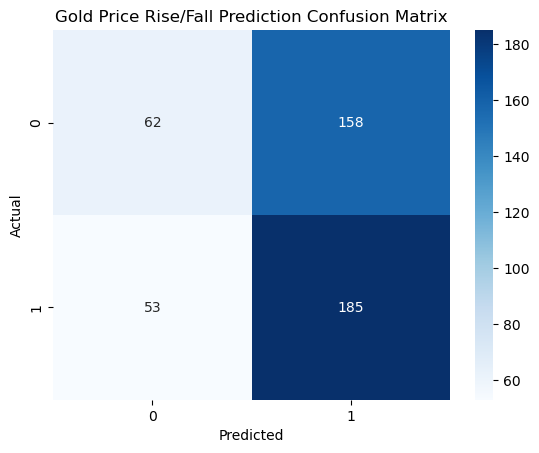

In [12]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gold Price Rise/Fall Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
with open("../models/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_model, f)
print("✅ Logistic Regression model saved!")

✅ Logistic Regression model saved!


In [14]:
sample_input = np.array([[1500, 80, 15.5, 1.45]])  # SPX, USO, SLV, EUR/USD
pred = log_model.predict(sample_input)
print("\n📈 Price Movement Prediction:", "⬆️ Up" if pred[0]==1 else "⬇️ Down")


📈 Price Movement Prediction: ⬇️ Down


C:\Users\athar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
